The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Import necessary libraries

In [128]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import traceback
import statsmodels.api as sm

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline


import warnings
warnings.simplefilter("ignore")


Load Data

In [2]:
file_path = "data/train.csv"
try:
    df = pd.read_csv(file_path, delimiter=',', low_memory=False)
    print('Data Load: Successful')
except Exception:
    traceback.print_exc()
    print('Data Load: Failure')

Data Load: Successful


Data Understanding

In [3]:
df.shape

(1460, 81)

In [4]:
# Print the head of the data
print("Head of the Data:")
df.head() 

Head of the Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Print the tail of the data
print("\nTail of the Data:")
df.tail()


Tail of the Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
def programmatic_assessment(df):
    cols = df.columns
    assess_df = pd.DataFrame()
    
    for i, col in enumerate(cols):
        assess_df.loc[i, 'variable'] = col
        assess_df.loc[i, 'datatype'] = df[col].dtype
        assess_df.loc[i, 'null_count'] = df[col].isna().sum()
        assess_df.loc[i, 'null_pcnt'] = round(((df[col].isna().sum() / df.shape[0]) * 100), 1)
        assess_df.loc[i, 'duplicate_count'] = df[col].duplicated().sum()
        assess_df.loc[i, 'count'] = df[col].describe()['count']

        # for numerical variable
        if df[col].dtype in ['int64', 'float64']:
            assess_df.loc[i, 'mean'] = df[col].describe()['mean']
            assess_df.loc[i, 'std'] = df[col].describe()['std']
            assess_df.loc[i, 'min'] = df[col].describe()['min']
            assess_df.loc[i, '25%'] = df[col].describe()['25%']
            assess_df.loc[i, '50%'] = df[col].describe()['50%']
            assess_df.loc[i, '75%'] = df[col].describe()['75%']
            assess_df.loc[i, 'max'] = df[col].describe()['max']
        
        # for categorical variable
        elif df[col].dtype in ['O']:
            assess_df.loc[i, 'unique'] = df[col].describe()['unique']
            assess_df.loc[i, 'top'] = df[col].describe()['top']
            assess_df.loc[i, 'freq'] = df[col].describe()['freq']
    
    return assess_df


In [10]:
assess_df = programmatic_assessment(df)
assess_df.sort_values(by=['null_count', 'datatype'],  ascending=False)

,variable,datatype,null_count,null_pcnt,duplicate_count,count,mean,std,min,25%,50%,75%,max,unique,top,freq
72,PoolQC,object,1453.0,99.5,1456.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Gd,3.0
74,MiscFeature,object,1406.0,96.3,1455.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Shed,49.0
6,Alley,object,1369.0,93.8,1457.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Grvl,50.0
73,Fence,object,1179.0,80.8,1455.0,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,MnPrv,157.0
25,MasVnrType,object,872.0,59.7,1456.0,588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,BrkFace,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,PoolArea,int64,0.0,0.0,1452.0,1460.0,2.758904,40.177307,0.0,0.0,0.0,0.0,738.0,NaN,NaN,NaN
75,MiscVal,int64,0.0,0.0,1439.0,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.0,15500.0,NaN,NaN,NaN
76,MoSold,int64,0.0,0.0,1448.0,1460.0,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0,NaN,NaN,NaN
77,YrSold,int64,0.0,0.0,1455.0,1460.0,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0,NaN,NaN,NaN


DATA CLEANING

In [11]:
# drop the columns with nulls more than 70%.
null_pcnt_filter = ((df.isna().sum() / df.shape[0]) * 100) > 70
cols_to_drop = df.columns[null_pcnt_filter]
df.drop(cols_to_drop, axis=1, inplace=True)

In [12]:
df.shape

(1460, 77)

In [13]:
# filter variables with null_count greater than zero, sort them by descending order
assess_df = programmatic_assessment(df)
null_count_df = assess_df[['variable', 
                           'datatype',
                           'null_count', 
                           'null_pcnt']][assess_df['null_count']>0].sort_values(by=['null_count'], 
                                                                                ascending=False)
null_count_df['null_pcnt'] = null_count_df['null_pcnt'].apply(lambda x: float('{:0.2f}'.format(x)))
null_count_df

,variable,datatype,null_count,null_pcnt
24,MasVnrType,object,872.0,59.7
56,FireplaceQu,object,690.0,47.3
3,LotFrontage,float64,259.0,17.7
57,GarageType,object,81.0,5.5
58,GarageYrBlt,float64,81.0,5.5
59,GarageFinish,object,81.0,5.5
62,GarageQual,object,81.0,5.5
63,GarageCond,object,81.0,5.5
31,BsmtExposure,object,38.0,2.6
34,BsmtFinType2,object,38.0,2.6


In [14]:
#Droping column MasVnrType as it has only 40% of the values not null
df.drop('MasVnrType', axis=1, inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [17]:
# From the above data and metadata file , looks like `FireplaceQu` and `Fireplaces` represent same 

df['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [18]:
df[['Fireplaces', 'FireplaceQu']][df['Fireplaces'] == 0]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


Looks like all the `0` value in Fireplaces are `NaN` in FireplaceQu. Let impute the data

In [19]:
df['Fireplaces'][df['FireplaceQu'].isna()].value_counts()

Fireplaces
0    690
Name: count, dtype: int64

In [20]:
df.loc[df['FireplaceQu'].isna(), 'FireplaceQu'] = 'NA'

In [21]:
df['FireplaceQu'].value_counts()

FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

Handle Null Values in the data

In [22]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

Handle Null Values in the dataset by imputation

In [23]:
redundant_cols = ['SalePrice', 'Id', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt']
col_list = [col for col in df.columns if col not in redundant_cols]
df_temp = df.loc[:, col_list]
df_temp.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorc

In [24]:
cont_feats = [col for col in df_temp.columns if df_temp[col].dtype in ['int64', 'float64']]
# Iterative Imputation
iter_imputer = IterativeImputer(random_state=42)
iter_imputed = iter_imputer.fit_transform(df_temp[cont_feats])
df_iter_imputed = pd.DataFrame(iter_imputed, columns=cont_feats)

In [25]:
df_iter_imputed

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60.0,65.0,8450.0,7.0,5.0,196.0,706.0,0.0,150.0,856.0,...,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0
1,20.0,80.0,9600.0,6.0,8.0,0.0,978.0,0.0,284.0,1262.0,...,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,60.0,68.0,11250.0,7.0,5.0,162.0,486.0,0.0,434.0,920.0,...,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0
3,70.0,60.0,9550.0,7.0,5.0,0.0,216.0,0.0,540.0,756.0,...,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0
4,60.0,84.0,14260.0,8.0,5.0,350.0,655.0,0.0,490.0,1145.0,...,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,0.0,0.0,0.0,953.0,953.0,...,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0
1456,20.0,85.0,13175.0,6.0,6.0,119.0,790.0,163.0,589.0,1542.0,...,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1457,70.0,66.0,9042.0,7.0,9.0,0.0,275.0,0.0,877.0,1152.0,...,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0
1458,20.0,68.0,9717.0,5.0,6.0,0.0,49.0,1029.0,0.0,1078.0,...,1.0,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0


In [26]:
col_list =['LotFrontage','MasVnrArea']
col_list

['LotFrontage', 'MasVnrArea']

In [27]:
df_temp[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [28]:
df_iter_imputed[col_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


Observe the change in distribution of variable post imputation:

(array([223., 817., 355.,  47.,  11.,   5.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

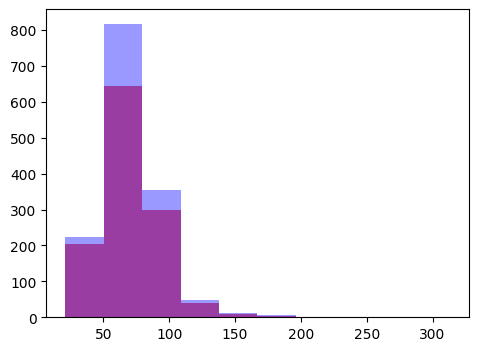

In [29]:
col = 'LotFrontage'
plt.figure(figsize = [12, 4])
plt.subplot(1, 2, 1)
plt.hist(df_temp[col], color='red', alpha = 0.6)
plt.hist(df_iter_imputed[col], color='blue', alpha = 0.4)

<Axes: xlabel='LotFrontage', ylabel='Count'>

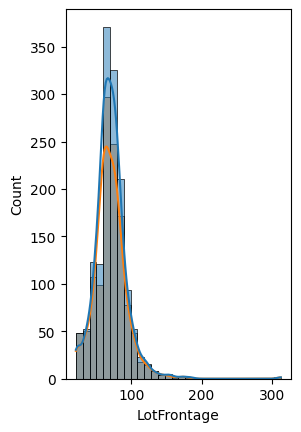

In [30]:
plt.subplot(1, 2, 1)
sb.histplot(df_temp[col], bins=30, kde=True, color=sb.color_palette()[1])
sb.histplot(df_iter_imputed[col], bins=30, kde=True, color=sb.color_palette()[0])
# sb.disptlot(df_temp[col], hist=False, kde = True, 
#             kde_kws = {'alpha' :0.6, "shade": True}, color = sb.color_palette()[1])
# sb.disptlot(df_iter_imputed[col], hist=False, kde = True, 
#             kde_kws = {'alpha' :0.4, "shade": True}, color = sb.color_palette()[0]);

In [31]:
# replace the columns having nulls with imputed columns 
df['LotFrontage'] = df_iter_imputed['LotFrontage']
df['MasVnrArea'] = df_iter_imputed['MasVnrArea']


In [32]:
# filter variables with null_count greater than zero, sort them by descending order
assess_df = programmatic_assessment(df)
null_count_df = assess_df[['variable', 
                           'datatype',
                           'null_count', 
                           'null_pcnt']][assess_df['null_count']>0].sort_values(by=['null_count'], 
                                                                                ascending=False)
null_count_df['null_pcnt'] = null_count_df['null_pcnt'].apply(lambda x: float('{:0.2f}'.format(x)))
null_count_df

,variable,datatype,null_count,null_pcnt
56,GarageType,object,81.0,5.5
57,GarageYrBlt,float64,81.0,5.5
58,GarageFinish,object,81.0,5.5
61,GarageQual,object,81.0,5.5
62,GarageCond,object,81.0,5.5
30,BsmtExposure,object,38.0,2.6
33,BsmtFinType2,object,38.0,2.6
28,BsmtQual,object,37.0,2.5
29,BsmtCond,object,37.0,2.5
31,BsmtFinType1,object,37.0,2.5


In [33]:
garage_col_list = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

In [34]:
df[df['GarageType'].isna()][garage_col_list]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [35]:
filter = df['GarageYrBlt'].isna()
df.loc[filter, 'GarageType'] = 'NA'
df.loc[filter, 'GarageFinish'] = 'NA'
df.loc[filter, 'GarageQual'] = 'NA'
df.loc[filter, 'GarageCond'] = 'NA'

In [36]:
# drop the null entries from above specified column list, as the null count percent is very low, impact on final model will be negligible

col_list = ['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1','Electrical']

for col in col_list:
    drop_index = df[df[col].isna()].index
    df = df.drop(drop_index)

In [37]:
df.shape

(1420, 76)

In [38]:
df[df.duplicated()]
df.shape

(1420, 76)

Fixing the value in `MSZoing` column

In [39]:
df['MSZoning'].value_counts()

MSZoning
RL         1116
RM          214
FV           65
RH           15
C (all)      10
Name: count, dtype: int64

In [40]:
df.loc[df['MSZoning'] == 'C (all)', 'MSZoning'] = 'C'

In [41]:
df['MSZoning'].value_counts()

MSZoning
RL    1116
RM     214
FV      65
RH      15
C       10
Name: count, dtype: int64

Feature Extraction:

In [42]:
year_cols = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold', 'GarageYrBlt']
df[year_cols]

,YearBuilt,YearRemodAdd,YrSold,MoSold,GarageYrBlt
0,2003,2003,2008,2,2003.0
1,1976,1976,2007,5,1976.0
2,2001,2002,2008,9,2001.0
3,1915,1970,2006,2,1998.0
4,2000,2000,2008,12,2000.0
...,...,...,...,...,...
1455,1999,2000,2007,8,1999.0
1456,1978,1988,2010,2,1978.0
1457,1941,2006,2010,5,1941.0
1458,1950,1996,2010,4,1950.0


In [43]:
# calculate the age of the house
# years = 'YrSold' - 'YearBuilt' and obtain months from 'MoSold'
df['house_age_years'] = (df['YrSold'] - df['YearBuilt']) + df['MoSold'].apply(lambda x: float(f'0.{x}') if len(str(x))==2 else float(f'0.0{x}'))


In [44]:
df['house_remodel_age_years'] = (df['YrSold'] - df['YearRemodAdd']) + df['MoSold'].apply(lambda x: float(f'0.{x}') if len(str(x))==2 else float(f'0.0{x}'))

df['garage_age_years'] = (df['YrSold'] - df['GarageYrBlt']) + df['MoSold'].apply(lambda x: float(f'0.{x}') if len(str(x))==2 else float(f'0.0{x}'))


In [45]:
filter = df[df['GarageYrBlt'].isna()].index
df.loc[filter, 'garage_age_years'] = 0

In [46]:
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold', 
             'house_age_years', 'house_remodel_age_years', 'garage_age_years']
df[year_cols]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MoSold,house_age_years,house_remodel_age_years,garage_age_years
0,2003,2003,2003.0,2008,2,5.02,5.02,5.02
1,1976,1976,1976.0,2007,5,31.05,31.05,31.05
2,2001,2002,2001.0,2008,9,7.09,6.09,7.09
3,1915,1970,1998.0,2006,2,91.02,36.02,8.02
4,2000,2000,2000.0,2008,12,8.12,8.12,8.12
...,...,...,...,...,...,...,...,...
1455,1999,2000,1999.0,2007,8,8.08,7.08,8.08
1456,1978,1988,1978.0,2010,2,32.02,22.02,32.02
1457,1941,2006,1941.0,2010,5,69.05,4.05,69.05
1458,1950,1996,1950.0,2010,4,60.04,14.04,60.04


In [47]:
drop_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']
df.drop(drop_cols, axis=1, inplace=True)

In [48]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scre

Null check in dataframe

In [49]:
df.isna().sum().sum()

0

Check the variables with low variance:

In [50]:
low_var_cols = []
for col in df.columns:
    if len(df[col].value_counts().index) < 3:
        low_var_cols.append(col)
        
print(low_var_cols)

['Street', 'Utilities', 'CentralAir']


In [51]:
df.Street.value_counts()

Street
Pave    1414
Grvl       6
Name: count, dtype: int64

In [52]:
df.CentralAir.value_counts()

CentralAir
Y    1339
N      81
Name: count, dtype: int64

In [53]:
df.Utilities.value_counts()

Utilities
AllPub    1419
NoSeWa       1
Name: count, dtype: int64

In [54]:
drop_cols = ['Street', 'Utilities', 'CentralAir']
df.drop(drop_cols, axis=1, inplace=True)

In [55]:
drop_cols = ['Id']
df.drop(drop_cols, axis=1, inplace=True)

In [56]:
#As GarageCars potray the same information as GarageArea but in different metric, it can be dropped from the analysis
drop_cols = ['GarageCars']
df.drop(drop_cols, axis=1, inplace=True)

Removing the outliers

In [57]:
df_temp = df.copy(deep=True)

In [58]:
def remove_outliers(df):
    numerical_cols = [col for col in df.columns if df[col].dtype != 'O']
    for col in numerical_cols:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3-Q1
        filter = (df[col]>=(Q1-(1.5*IQR))) & (df[col]<=(Q3+(1.5*IQR)))
        df =  df[filter] 
    return df


df_temp = remove_outliers(df_temp)

In [59]:
df_temp.shape

(1400, 69)

In [60]:
df.shape

(1420, 69)

In [61]:
print(f'Data loss would be: {round((((df.shape[0] - df_temp.shape[0])/df.shape[0])*100), 1)}%')

Data loss would be: 1.4%


In [62]:
def remove_outliers(df):
    numerical_cols = [col for col in df.columns if df[col].dtype != 'O']
    for col in numerical_cols:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.99)
        IQR = Q3-Q1
        filter = (df[col]>=(Q1-(1.5*IQR))) & (df[col]<=(Q3+(1.5*IQR)))
        df =  df[filter] 
    return df


df = remove_outliers(df)

Coversion on catagorical Columns

In [63]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']
print(categorical_cols)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [64]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure',
    'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
    'GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Gd,RFn,TA,TA,TA,IR1


In [65]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [66]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [67]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure',
    'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
    'GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,3,2,3,3,2,0


In [68]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure',
    'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
    'GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].dtypes

LandSlope       int64
ExterQual       int64
BsmtQual        int64
BsmtCond        int64
BsmtExposure    int64
BsmtFinType1    int64
BsmtFinType2    int64
HeatingQC       int64
KitchenQual     int64
GarageFinish    int64
GarageQual      int64
GarageCond      int64
ExterCond       int64
LotShape        int64
dtype: object

In [69]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,house_age_years,house_remodel_age_years,garage_age_years
0,60,RL,65.0,8450,3,Lvl,Inside,0,CollgCr,Norm,...,0,0,0,0,WD,Normal,208500,5.02,5.02,5.02
1,20,RL,80.0,9600,3,Lvl,FR2,0,Veenker,Feedr,...,0,0,0,0,WD,Normal,181500,31.05,31.05,31.05
2,60,RL,68.0,11250,0,Lvl,Inside,0,CollgCr,Norm,...,0,0,0,0,WD,Normal,223500,7.09,6.09,7.09
3,70,RL,60.0,9550,0,Lvl,Corner,0,Crawfor,Norm,...,0,0,0,0,WD,Abnorml,140000,91.02,36.02,8.02
4,60,RL,84.0,14260,0,Lvl,FR2,0,NoRidge,Norm,...,0,0,0,0,WD,Normal,250000,8.12,8.12,8.12


Seaborn's pair plot

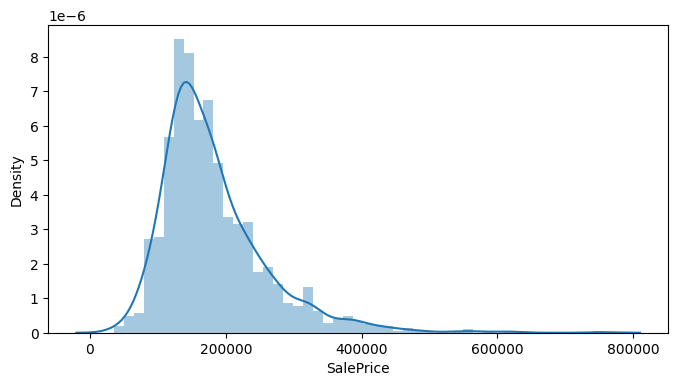

In [70]:
plt.figure(figsize=(8,4))
sb.distplot(df['SalePrice'], kde=True)
plt.show()

In [71]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

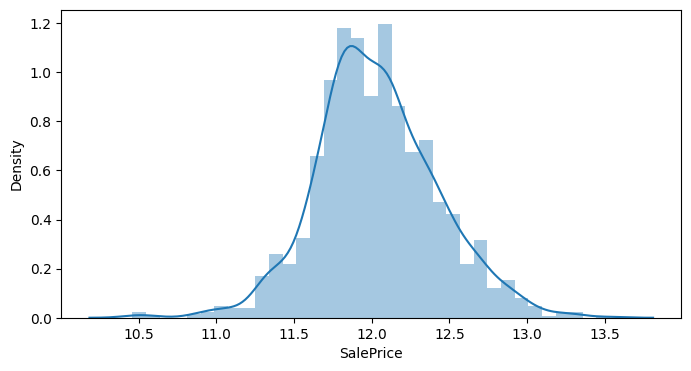

In [72]:
plt.figure(figsize=(8,4))
sb.distplot(df['SalePrice'], kde=True)
plt.show()

Create dummy variables:

In [73]:
data = pd.get_dummies(df, drop_first=True )
data.shape

(1400, 190)

In [74]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=190)

Model building and evaluation:

In [75]:
# Split the data into train and test datasets:
# model building packages

df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=42)

In [76]:
#Scale the data:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print(numerical_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'house_age_years', 'house_remodel_age_years', 'garage_age_years']


In [77]:
# load scaler
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

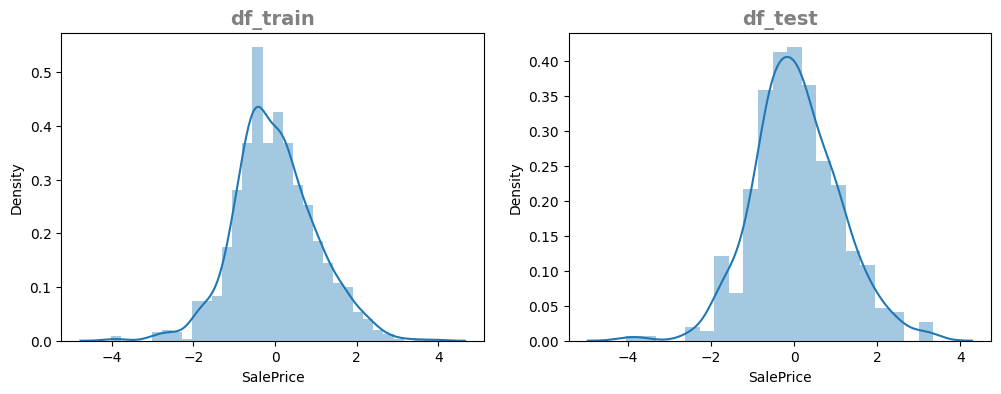

In [78]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sb.distplot(df_train.SalePrice)
plt.title('df_train', weight='bold', color='grey', fontsize=14);

plt.subplot(1,2,2)
sb.distplot(df_test.SalePrice)
plt.title('df_test', weight='bold', color='grey', fontsize=14);

In [79]:
# train data
X_train = df_train
y_train = df_train.pop('SalePrice')

In [80]:

# test data
X_test = df_test
y_test = df_test.pop('SalePrice')

In [81]:
X_train.shape, X_test.shape

((979, 189), (420, 189))

In [150]:
y_train.shape, y_test.shape

((979,), (420,))

Model building using Linear Regression and RFE (Recursive Feature Elimination)

In [82]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select= 100, step=1)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [83]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,False,10
1,LotFrontage,False,65
2,LotArea,True,1
3,LotShape,False,59
4,LandSlope,False,87
...,...,...,...
184,SaleCondition_AdjLand,True,1
185,SaleCondition_Alloca,False,76
186,SaleCondition_Family,False,83
187,SaleCondition_Normal,True,1


In [84]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
print(f'Top {len(rfe_sel_columns)} columns:')
print('----------------')
print(rfe_sel_columns)

Top 100 columns:
----------------
['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'house_age_years', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'Roof

In [139]:
rfe_sel_columns

['OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'PoolArea',
 'house_age_years',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_MeadowV',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',


In [85]:
#Filter the test and train data using the RFE columns:

X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

Lasso regression model

In [86]:
#Lasso regression model:
# Checking the dimension of X_train & y_train
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (979, 100)
y_train: (979,)


In [87]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

Lasso(alpha=0.001)

In [88]:
y_train_pred = lm.predict(X_train)
print(f'R2 Score on train data: {r2_score(y_true=y_train,y_pred=y_train_pred)}')

R2 Score on train data: 0.9123454803572383


In [89]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -0.891),
 ('LotFrontage', 0.064),
 ('LotArea', 0.234),
 ('LotShape', 0.151),
 ('LandSlope', 0.117),
 ('OverallQual', 0.032),
 ('OverallCond', -0.0),
 ('MasVnrArea', 0.106),
 ('ExterQual', 0.0),
 ('ExterCond', 0.024),
 ('BsmtQual', -0.003),
 ('BsmtCond', 0.335),
 ('BsmtExposure', 0.092),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', -0.21),
 ('BsmtFinType2', 0.288),
 ('BsmtFinSF2', 0.054),
 ('BsmtUnfSF', 0.19),
 ('TotalBsmtSF', 0.057),
 ('HeatingQC', -0.016),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.161),
 ('GrLivArea', 0.299),
 ('BsmtFullBath', -0.091),
 ('BsmtHalfBath', -0.221),
 ('FullBath', -0.064),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.161),
 ('KitchenAbvGr', 0.033),
 ('KitchenQual', 0.208),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.025),
 ('GarageFinish', 0.1),
 ('GarageArea', 0.0),
 ('GarageQual', -0.0),
 ('GarageCond', 0.06),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.139),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', -1.797),

In [90]:
#Apply GridSearchCV, to improve the model with the optimal value of alpha:
folds = KFold(n_splits=10, shuffle=True, random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [91]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.030511,0.003748,0.003114,0.000846,0.0001,{'alpha': 0.0001},0.926567,0.889894,0.914234,0.754708,...,0.924375,0.933168,0.925154,0.932456,0.923817,0.921113,0.924414,0.936535,0.927069,0.004822
1,0.028661,0.002363,0.001134,0.001077,0.0010,{'alpha': 0.001},0.901991,0.902366,0.916344,0.820726,...,0.912798,0.919612,0.913227,0.919309,0.911564,0.908165,0.911996,0.924711,0.914791,0.004644
2,0.008294,0.007459,0.001563,0.004688,0.0100,{'alpha': 0.01},0.891049,0.859373,0.900220,0.907834,...,0.872080,0.869055,0.874128,0.881741,0.871099,0.866542,0.872291,0.896415,0.875012,0.008056
3,0.005347,0.005919,0.003589,0.003793,0.0500,{'alpha': 0.05},0.866547,0.825379,0.857127,0.887468,...,0.843065,0.840190,0.844502,0.848802,0.840174,0.837350,0.843666,0.870755,0.845903,0.008883
4,0.005493,0.003870,0.012091,0.024344,0.1000,{'alpha': 0.1},0.831432,0.783295,0.805317,0.852741,...,0.809302,0.804702,0.811597,0.813579,0.804694,0.800985,0.809132,0.834617,0.811102,0.008695


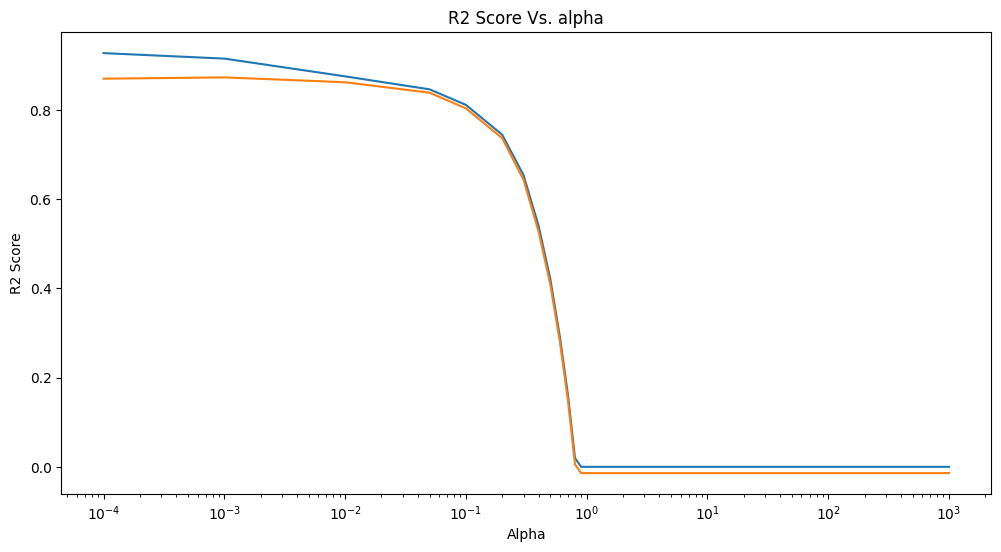

In [92]:
plt.figure(figsize=(12,6))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.title("R2 Score Vs. alpha")
plt.show()

In [93]:
# Check the best parameter (Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [120]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(f'R2 Score on train data: {r2_score(y_true=y_train,y_pred=y_train_pred)}')
print(f'R2 Score on test data: {r2_score(y_true=y_test,y_pred=y_test_pred)}')

R2 Score on train data: 0.9123454803572383
R2 Score on test data: 0.9240928710053207


In [121]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [122]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
11,BsmtCond,0.334686
23,GrLivArea,0.298685
88,Condition1_RRNe,0.298289
15,BsmtFinType2,0.288403
57,LotConfig_Inside,0.251372
96,BldgType_2fmCon,0.247226
2,LotArea,0.233744
30,KitchenQual,0.208040
17,BsmtUnfSF,0.189826
86,Condition1_RRAe,0.189166


Ridge Regression

In [97]:
#Ridge Regression:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(f'R2 Score on train data: {r2_score(y_train,y_train_pred)}')
y_test_pred = ridge.predict(X_test)
print(f'R2 Score on test data: {r2_score(y_test,y_test_pred)}')

R2 Score on train data: 0.925638540275575
R2 Score on test data: 0.9109926202888526


In [98]:

folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [99]:

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007616,0.001462,0.003625,0.000736,0.0001,{'alpha': 0.0001},0.930985,0.886952,0.914158,0.743923,...,0.924861,0.933663,0.925667,0.933032,0.924280,0.921563,0.924952,0.937043,0.927561,0.004842
1,0.005908,0.001988,0.003785,0.002193,0.0010,{'alpha': 0.001},0.930959,0.886978,0.914154,0.744387,...,0.924861,0.933662,0.925667,0.933032,0.924280,0.921563,0.924952,0.937043,0.927561,0.004842
2,0.004709,0.002636,0.003142,0.002300,0.0100,{'alpha': 0.01},0.930695,0.887235,0.914109,0.748923,...,0.924857,0.933655,0.925664,0.933028,0.924277,0.921561,0.924947,0.937040,0.927557,0.004841
3,0.005735,0.001551,0.002663,0.002204,0.0500,{'alpha': 0.05},0.929580,0.888305,0.913899,0.766955,...,0.924781,0.933496,0.925589,0.932946,0.924203,0.921508,0.924848,0.936975,0.927477,0.004829
4,0.006604,0.003704,0.001934,0.001589,0.1000,{'alpha': 0.1},0.928307,0.889499,0.913630,0.785535,...,0.924598,0.933106,0.925409,0.932750,0.924023,0.921369,0.924616,0.936822,0.927283,0.004803


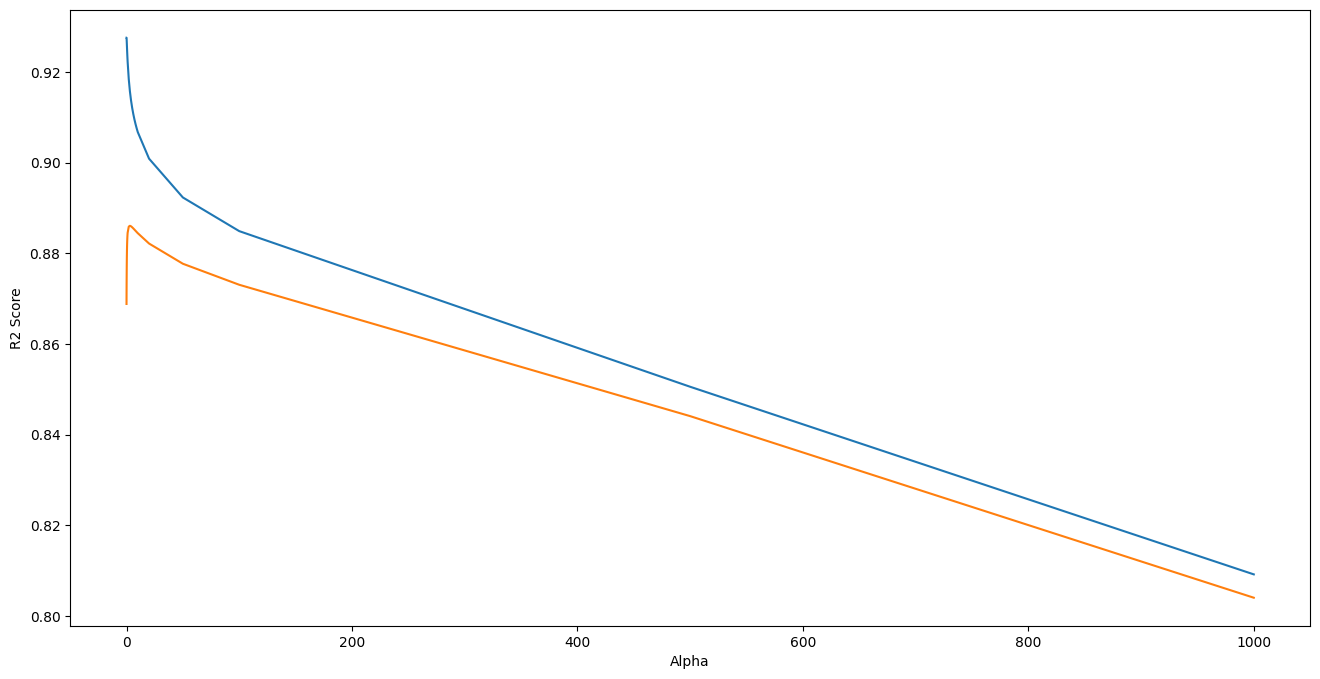

In [100]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [101]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 3.0}

In [115]:
ridge = Ridge(alpha = 3)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(f'R2 Score on train data: {r2_score(y_train,y_pred_train)}')

y_pred_test = ridge.predict(X_test)
print(f'R2 Score on test data: {r2_score(y_test,y_pred_test)}')

R2 Score on train data: 0.9149300630462407
R2 Score on test data: 0.9227217093381243


In [116]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
15,BsmtFinType2,0.413511
39,EnclosedPorch,0.339518
17,BsmtUnfSF,0.314169
23,GrLivArea,0.307043
88,Condition1_RRNe,0.297470
30,KitchenQual,0.259851
57,LotConfig_Inside,0.246144
96,BldgType_2fmCon,0.222523
2,LotArea,0.217375
37,WoodDeckSF,0.208735


Model selection
 - Ridge Regression
        R2 train: 0.9149300630462407; R2 test: 0.9227217093381243; alpha: 3.0
- Lasso Regression:
        R2 train: 0.925638540275575
        R2 test: 0.9109926202888526
        alpha: 0.001
        
Selecting the Lasso for final model

Final Model

In [112]:
#Final model:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(f'R2 Score on train data: {r2_score(y_true=y_train,y_pred=y_train_pred)}')
print(f'R2 Score on train data: {r2_score(y_true=y_test,y_pred=y_test_pred)}')

R2 Score on train data: 0.9123454803572383
R2 Score on train data: 0.9240928710053207


In [111]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
11,BsmtCond,0.334686
23,GrLivArea,0.298685
88,Condition1_RRNe,0.298289
15,BsmtFinType2,0.288403
57,LotConfig_Inside,0.251372
96,BldgType_2fmCon,0.247226
2,LotArea,0.233744
30,KitchenQual,0.208040
17,BsmtUnfSF,0.189826
86,Condition1_RRAe,0.189166
